<a href="https://colab.research.google.com/github/Isdra77/VisionArtificial/blob/Pr%C3%A1ctica-5/Copia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install inference_sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.13
    Uninstalling aiohttp-3.11.13:
      Successfully uninstalled aiohttp-3.11.13


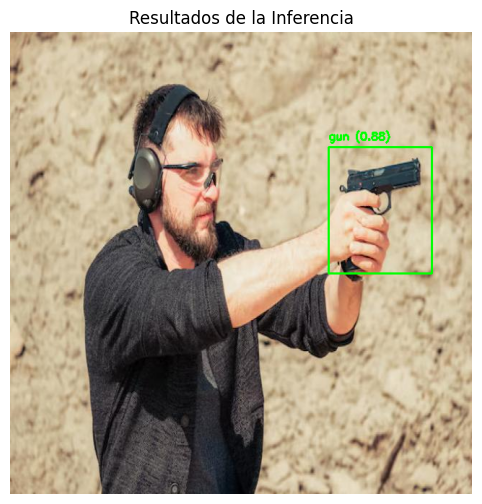

In [3]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from inference_sdk import InferenceHTTPClient

# Inicializa el cliente
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="CngjX5UOyPvErMqWn3Fr"  # Reemplaza con tu API Key real
)

# Ruta de la imagen de entrada y su destino
input_image_path = "/content/3_avif.rf.77b82f980d188aa62d8bf47bd681f2d7.jpg"
converted_image_path = "imagen_convertida_4.jpeg"

# Convierte la imagen a .jpg (asegurando el formato correcto)
with Image.open(input_image_path) as img:
    img.convert("RGB").save(converted_image_path, "JPEG")

# Realiza la inferencia con la imagen convertida
result = CLIENT.infer(converted_image_path, model_id="pistol-mxl75/1")

# Lee la imagen original
image = cv2.imread(converted_image_path)

# Dibuja las predicciones en la imagen si existen
if 'predictions' in result:
    for pred in result['predictions']:
        center_x, center_y = int(pred['x']), int(pred['y'])
        width, height = int(pred['width']), int(pred['height'])
        label = pred['class']
        confidence = pred['confidence']

        # Calcula las esquinas del rectángulo
        x1, y1 = int(center_x - width / 2), int(center_y - height / 2)
        x2, y2 = int(center_x + width / 2), int(center_y + height / 2)

        # Dibuja el cuadro delimitador y la etiqueta
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(
            image, f"{label} ({confidence:.2f})",
            (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 255, 0), 2
        )

# Convierte la imagen a RGB (OpenCV usa BGR por defecto)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Configura la visualización de la imagen con resultados
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title('Resultados de la Inferencia')
plt.axis('off')  # Desactiva los ejes
plt.show()